# find-trump

**Author: Gurveer Dhindsa** 

Portions of this template are based on notebook by Jorge Rodríguez Araújo

    https://medium.com/abraia/first-steps-with-transfer-learning-for-custom-image-classification-with-keras-b941601fcad5

# Step 1: Load the image dataset

In [0]:
#%%capture
from glob import glob
import re

# Load data from GitHub repo:
!wget https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip?raw=true
!unzip SYSC4906_Assig2_Data.zip?raw=true

# Get list of filenames for the four datasets:
TRAIN_DIR = 'train'
TEST_DIR = 'test'
trump_train = glob('train/trump/*.jpeg')
trump_test = glob('test/trump/*.jpeg')
decoy_train = glob('train/decoy/*.jpeg')
decoy_test = glob('test/decoy/*.jpeg')

# Sort the files
trump_train = sorted(trump_train, key=lambda x:float(re.findall("(\d+)",x)[0]))
trump_test = sorted(trump_test, key=lambda x:float(re.findall("(\d+)",x)[0]))
decoy_train = sorted(decoy_train, key=lambda x:float(re.findall("(\d+)",x)[0]))
decoy_test = sorted(decoy_test, key=lambda x:float(re.findall("(\d+)",x)[0]))

--2019-11-17 18:10:44--  https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip?raw=true
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip [following]
--2019-11-17 18:10:44--  https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip [following]
--2019-11-17 18:10:45--  https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133,

##Deliverable 1: Display the first image in each of the four sets.



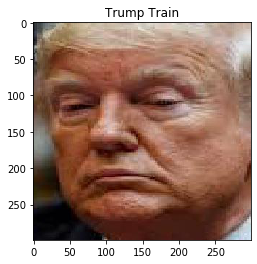

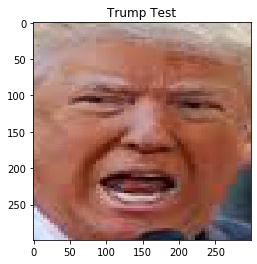

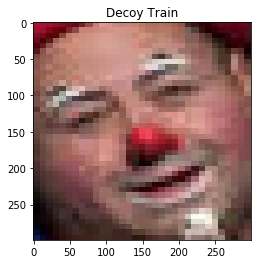

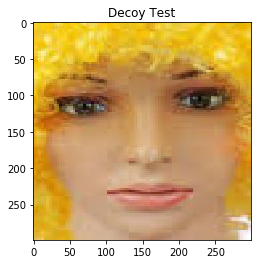

In [0]:
import numpy as np
from numpy import asarray
from numpy import expand_dims
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# Trump (training)
# Load the first image in the set
trumpTrainFirstImg = load_img(trump_train[0])
plt.figure()
plt.title('Trump Train')
# Display the image
plt.imshow(trumpTrainFirstImg)

# Trump (testing)
# Load the first image in the set
trumpTestFirstImg = load_img(trump_test[0])
plt.figure()
plt.title('Trump Test')
# Display the image
plt.imshow(trumpTestFirstImg)

# Decoy (training)
# Load the first image in the set
decoyTrainFirstImg = load_img(decoy_train[0])
plt.figure()
plt.title('Decoy Train')
# Display the image
plt.imshow(decoyTrainFirstImg)

# Decoy (testing)
# Load the first image in the set
decoyTestFirstImg = load_img(decoy_test[0])
plt.figure()
plt.title('Decoy Test')
# Display the image
plt.imshow(decoyTestFirstImg)


# Step 2: Load the original ImageNet-trained Inception v3

In [0]:
from keras.applications.inception_v3 import InceptionV3
import warnings

# ignore warnings
warnings.filterwarnings('ignore')
# load model
base_model = InceptionV3(weights='imagenet')
# Display a summary of the model structure:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_659 (Conv2D)             (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_659 (BatchN (None, 149, 149, 32) 96          conv2d_659[0][0]                 
__________________________________________________________________________________________________
activation_659 (Activation)     (None, 149, 149, 32) 0           batch_normalization_659[0][0]    
_______________________________________________________________________________________

## Deliverable 2: Number of parameters in layer 'conv2d_1 (Conv2D)'

The conv2d_1 (Conv2D) layer has 864 parameters


# Step 3: Test the original ImageNet-trained Inception v3 on our data

In [0]:
from keras.applications.inception_v3 import decode_predictions, preprocess_input
import numpy as np
from keras.preprocessing import image as kp_image

WIDTH = 299
HEIGHT = 299

def predictImgNet(model, img):
    """Run model prediction on an image and decode predictions into 1000 ImageNet classes
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = kp_image.img_to_array(img)  # Convert image to nparray
    x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
    x = preprocess_input(x)         # Normalize image to match how Inceptionv3 expects to receive images
    preds = model.predict(x)        # Use the model to compute prediction score for each possible class
    labels = decode_predictions(preds) # Decodes the output classes back to the original labels for the 1000 ImageNet classes
    return labels[0]

# Predict 'train/trump/100.jpeg'
trump_train_prediction = predictImgNet(base_model,Image.open('train/trump/100.jpeg'))

# Predict 'test/decoy/28.jpeg'
decoy_test_prediction = predictImgNet(base_model,Image.open('test/decoy/28.jpeg'))

print('Top ranked predictions and scores for train/trump/100.jpeg:')
for i in range(len(trump_train_prediction)):
  print('\t',trump_train_prediction[i][1],', ',trump_train_prediction[i][2])

print('\nTop ranked predictions and scores for test/decoy/28.jpeg:')
for i in range(len(decoy_test_prediction)):
  print('\t',decoy_test_prediction[i][1],', ',decoy_test_prediction[i][2])

-------------
DELIVERABLE 3
-------------
Top ranked predictions and scores for train/trump/100.jpeg:
	 neck_brace ,  0.42603034
	 wig ,  0.085619494
	 academic_gown ,  0.06182027
	 Windsor_tie ,  0.053091623
	 panpipe ,  0.016116256

Top ranked predictions and scores for test/decoy/28.jpeg:
	 bow_tie ,  0.9346934
	 wig ,  0.046026397
	 pomegranate ,  0.0012600437
	 teddy ,  0.0007310556
	 hair_slide ,  0.0006546831


## Deliverable 3: What are the top-ranked predictions  and their scores from the InceptionV3 original model for these two images? 
(Refer to output printed in step 3 cell)

#Step 4: Transfer Learning. Reload the InceptionV3 CNN, but with a new dense layer. 

In [0]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 2
    
# Re-load ImageNet pre-trained InceptionV3 CNN model excluding top
base_model = InceptionV3(weights='imagenet',include_top=False)
# Add GlobalAveragePooling layer
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.5)(x) # Dropout layer with 50% chance of dropout
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display a summary of the model structure:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_753 (Conv2D)             (None, None, None, 3 864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_753 (BatchN (None, None, None, 3 96          conv2d_753[0][0]                 
__________________________________________________________________________________________________
activation_753 (Activation)     (None, None, None, 3 0           batch_normalization_753[0][0]    
____________________________________________________________________________________________

##Deliverable 4: Examine the layers in the full model (see Step 2) and the new modified model using summary(). Which layer has the largest difference in the number of learnable parameters, when comparing the two models? What type of layer is it and why did the number of learnable parameters change?

The dense_1 layer changes the most. It is reduced from 2049000 to 4098 in number of parameters. This happened because now we only have to consider 2 classes rather than the ALL the classes we used in the previous model.

#Step 5: Create training and validation image generators to augment image sets

In [0]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(WIDTH, HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(WIDTH, HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 200 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


##Deliverable 5: Invoke “next” on your training ImageDataGenerator  to create a batch of 32 images and labels (where each label is a tuple). Create a 4rowx8col subplot matrix showing all 32 images. Each image should be titled with its label tuple.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

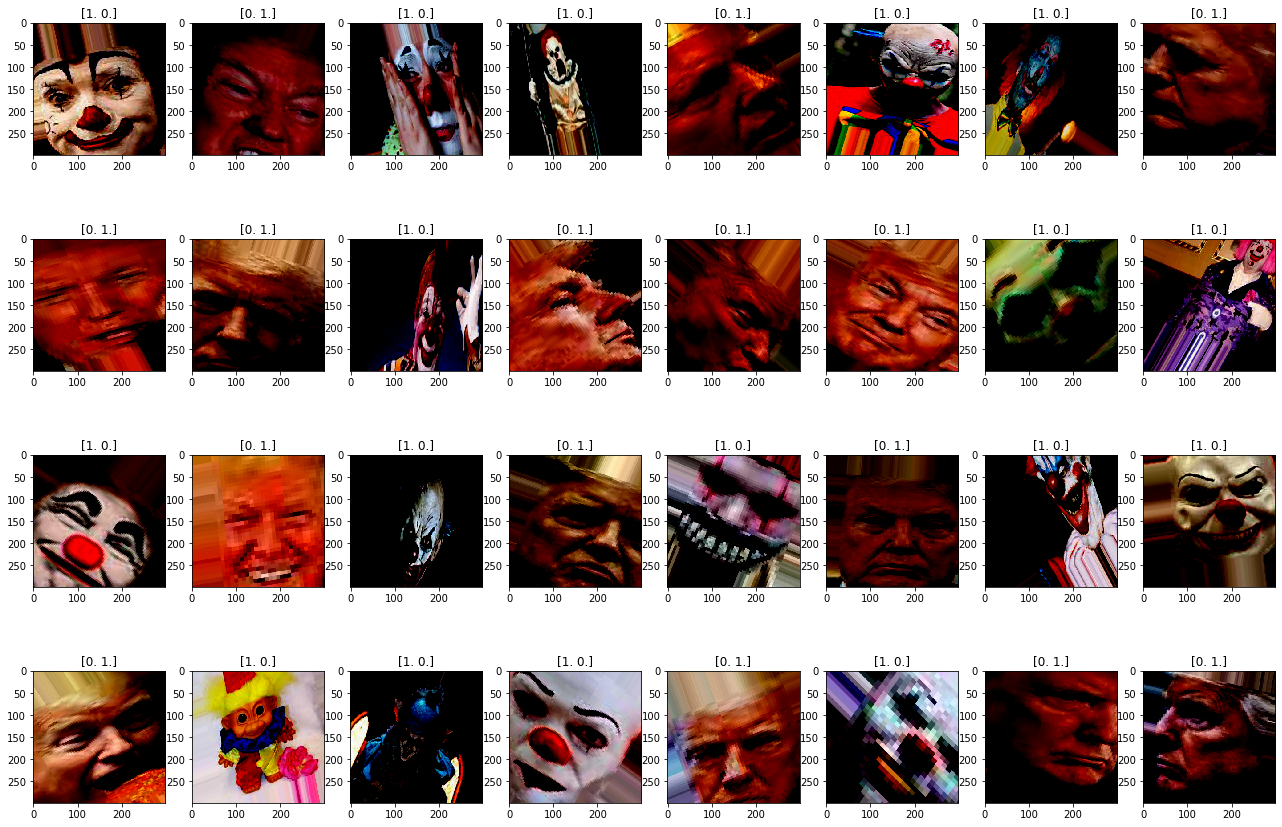

In [0]:
plt.figure()
# Invoke next on training ImageDataGenerator
images = train_generator.next()

# Iterate through batch of 32 images
for i in range(BATCH_SIZE):
  # 4rowx8col subplot matrix
  plt.subplot(4,8,i+1)
  # Adjust spacing between subplots for readability
  plt.subplots_adjust(right=3, top=3)
  # Title the subplot according to its label tuple
  plt.title(images[1][i])
  # Show the image
  plt.imshow(images[0][i])

#Step 6: Use transfer learning to train the new CNN

In [49]:
EPOCHS = 10
BATCH_SIZE = 32
STEPS_PER_EPOCH = 3
VALIDATION_STEPS = 1

MODEL_FILE = 'filename.model'

# Configure the model for training
history = model.fit_generator(train_generator,steps_per_epoch = STEPS_PER_EPOCH,epochs = EPOCHS,validation_data = validation_generator,validation_steps = VALIDATION_STEPS)  
model.save(MODEL_FILE)

Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 0.2444 - acc: 0.9271 - val_loss: 0.2305 - val_acc: 0.9375
Epoch 2/10
3/3 [==============================] - 2s 571ms/step - loss: 0.3137 - acc: 0.8516 - val_loss: 0.4044 - val_acc: 0.7812
Epoch 3/10
3/3 [==============================] - 2s 573ms/step - loss: 0.2694 - acc: 0.8854 - val_loss: 0.2005 - val_acc: 0.9375
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 0.2614 - acc: 0.8854 - val_loss: 0.4205 - val_acc: 0.8125
Epoch 5/10
3/3 [==============================] - 2s 761ms/step - loss: 0.2499 - acc: 0.9167 - val_loss: 0.2420 - val_acc: 0.9062
Epoch 6/10
3/3 [==============================] - 2s 704ms/step - loss: 0.2850 - acc: 0.8750 - val_loss: 0.3087 - val_acc: 0.8125
Epoch 7/10
3/3 [==============================] - 2s 817ms/step - loss: 0.3599 - acc: 0.8854 - val_loss: 0.3481 - val_acc: 0.8125
Epoch 8/10
3/3 [==============================] - 3s 849ms/step - loss: 0.2965 - acc: 0.8854 - v

##Deliverable 6: Plot the training and validation loss at each training epoch (i.e. the learning curve). Repeat for accuracy instead of loss.

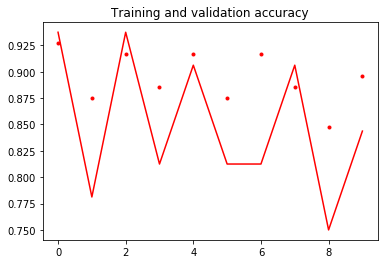

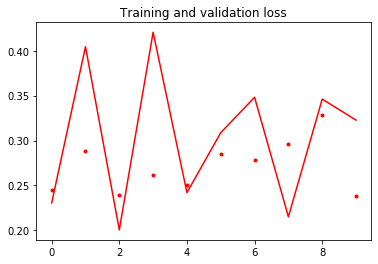

In [51]:
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

#Step 7: Test the new CNN

In [0]:
from keras.models import load_model

model = load_model(MODEL_FILE)

In [0]:
from keras.applications.inception_v3 import decode_predictions, preprocess_input
import numpy as np
from keras.preprocessing import image as kp_image

HEIGHT = 299
WIDTH = 299

def predictTrump(model, img):
    """Run model prediction on an image and decode predictions into 1000 ImageNet classes
    Args:
        model: keras model
        img: PIL format image
    Returns:
        Class label with higher predicted probabilities 
    """
    x = kp_image.img_to_array(img)  # Convert image to nparray
    x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
    x = preprocess_input(x)         # Normalize image to match how Inceptionv3 expects to receive images
    preds = model.predict(x)        # Use the model to compute prediction score for each possible class
    label = 'trump' if preds[0][1]>preds[0][0] else 'decoy' # Decodes the predicted class scores to assign a single class label
    return label

# Example code showing how to predict a single image label:
img = kp_image.load_img('test/decoy/28.jpeg', target_size=(HEIGHT, WIDTH))
label = predictTrump(model, img)

##Deliverable 7: Print confusion matrix and accuracy:

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt     

# Function to pretty-print confusion matrix. Doesn't work perfectly...
def printCM(cm,labels):
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  return

labels = ['decoy', 'trump']

# Initialize true data array
y_true = []
# Initialize predicted data array
y_pred = []

# Iterate through each image in trump (test)
for imgPath in range(len(trump_test)):
  # Load image in PIL format
  img = kp_image.load_img(trump_test[imgPath],target_size=(HEIGHT,WIDTH))
  # Append a 'trump' label to true data
  y_true.append(labels[1])
  # Append the prediction
  y_pred.append(predictTrump(model, img))

# Iterate through each image in decoy (test)
for imgPath in range(len(decoy_test)):
  # Load image in PIL format
  img = kp_image.load_img(decoy_test[imgPath], target_size=(HEIGHT,WIDTH))
  # Append a 'decoy' label to true data
  y_true.append(labels[0])
  # Append the prediction
  y_pred.append(predictTrump(model, img))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Print the confusion matrix
printCM(cm, labels)

# Print the accuracy
print('Total accuracy is ', accuracy_score(y_true,y_pred))

NameError: name 'trump_test' is not defined